## Inference

In [1]:
import sys
sys.path.extend(['/home/zadiq/dev/salt', 
                 '/home/zadiq/dev/competitions/salt', 
                 '/home/zoguntim/dev/s9043nfqhq89gh423qhjbfu89b4tj1qbfug8943'])

from tgs import allocate_gpu, get_model, choose_threshold

allocate_gpu()

from tgs.dataset import SaltDataset
from tgs.models import TrainConfig
from tgs.metrics import iou, map_iou

%matplotlib inline

Using TensorFlow backend.


In [2]:
T = TrainConfig()
dataset = SaltDataset(**T.dataset_params, load_test_gen=True)

Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.


---

# Model 0 (0.711 @ t=0.7)
path: /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/models/weights.47-0.34.model

In [4]:
custom_objects = {
    "iou": iou, "map_iou": map_iou
}
folder="salt-08-25-14-09-08"
which="weights.47-0.34.model"
model = get_model(
    folder=folder, 
    which=which, 
    loss_name="weight_loss",
    custom_objects=custom_objects
)

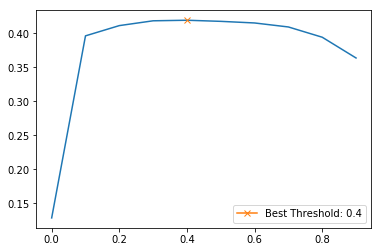

In [5]:
best_threshold = choose_threshold(model, dataset.val_gen)

In [23]:
threshold = 0.75
sub = dataset.make_submission(
    model, folder=folder, 
    which=which, threshold=threshold, 
)

/home/zadiq/dev/venv/dl_35/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


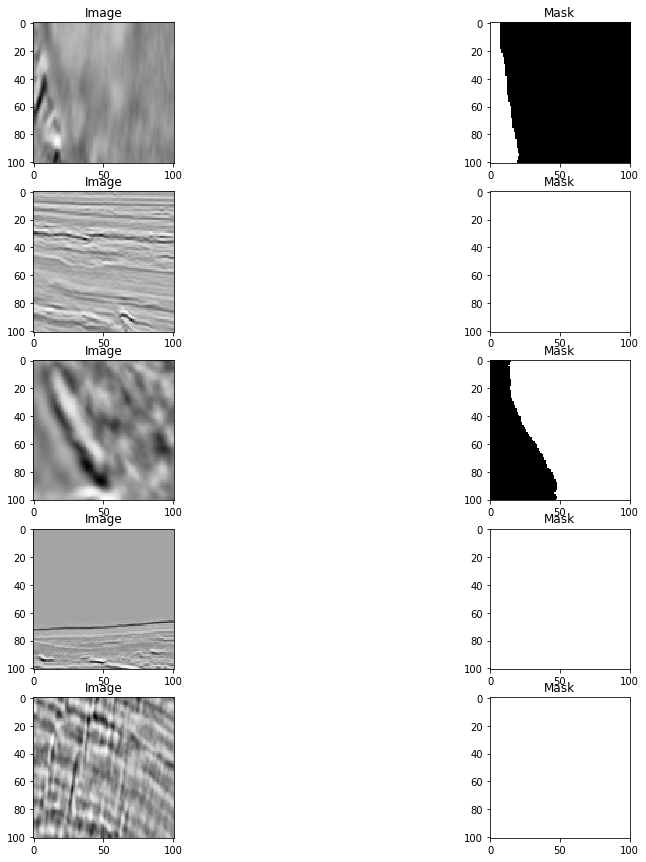

In [12]:
dataset.visualize_submission(sub)

---

# Model 1 (0.701)
path: /media/zadiq/ZHD/datasets/salt/models/salt-08-25-19-50-01/models/weights.90-0.26.model

In [3]:
custom_objects = {
    "iou": iou, "map_iou": map_iou
}
folder="salt-08-25-19-50-01"
which="weights.90-0.26.model"
model = get_model(
    folder=folder, 
    which=which, 
    loss_name="weight_loss",
    custom_objects=custom_objects
)

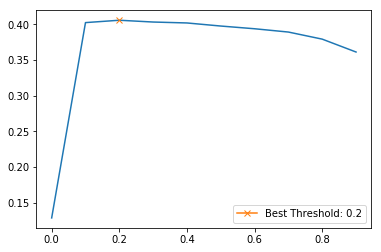

In [5]:
best_threshold = choose_threshold(model, dataset.val_gen)

In [6]:
thresholds = [best_threshold, .5, .6, .7, .75]
for t in thresholds:
    sub = dataset.make_submission(
        model, folder=folder, 
        which=which, threshold=t, 
    )

/home/zadiq/dev/venv/dl_35/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


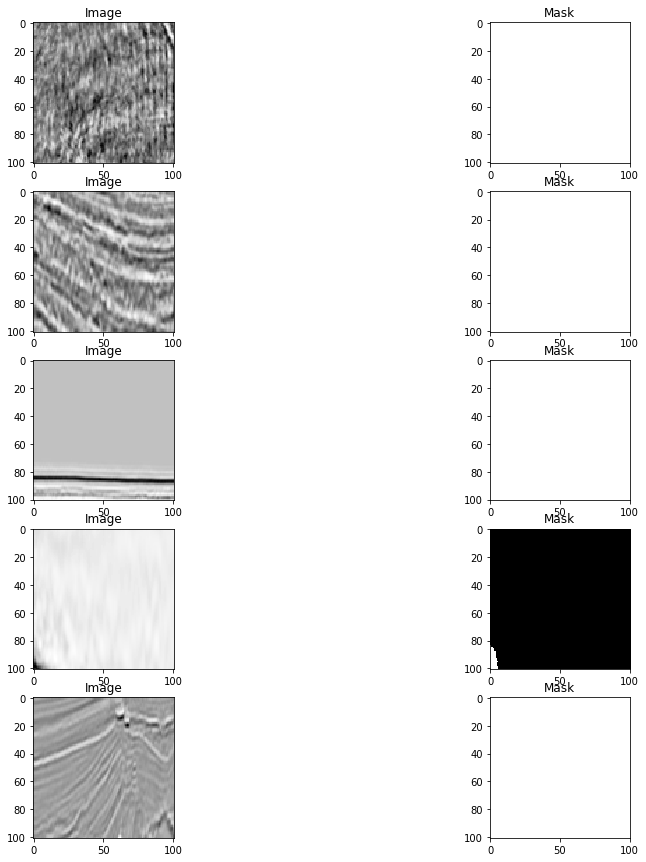

In [7]:
dataset.visualize_submission(sub)

---

# Model 2 ()
path: /media/zadiq/ZHD/datasets/salt/models/salt-08-26-04-13-09/models/weights.07-1.01.model

In [4]:
from tgs.models import BlueBlock
custom_objects = {
    "iou": iou, "map_iou": map_iou, "BlueBlock": BlueBlock,
}
folder="salt-08-26-04-13-09"
which="weights.07-1.01.model"
model = get_model(
    folder=folder, 
    which=which, 
    loss_name="bce_dice_loss",
    loss_is_wrapped=False,
    custom_objects=custom_objects
)

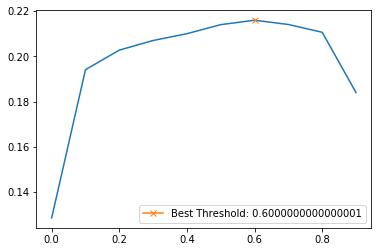

In [5]:
best_threshold = choose_threshold(model, dataset.val_gen)

In [6]:
thresholds = [best_threshold, .5, .6, .7, .75]
for t in thresholds:
    sub = dataset.make_submission(
        model, folder=folder, 
        which=which, threshold=t, 
    )

/home/zadiq/dev/venv/dl_35/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


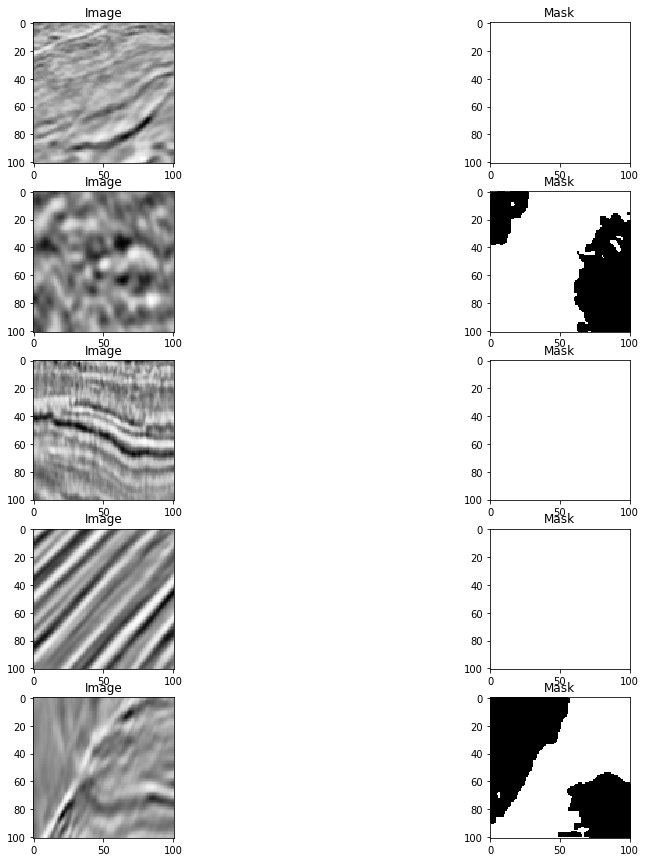

In [11]:
dataset.visualize_submission(sub)